In [4]:
pip install keras


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.optimizers import Adam

In [7]:
# Load the diabetes dataset
diabetes_data = load_diabetes()

# Convert to DataFrame for easier exploration
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

In [8]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [9]:
# Add the target variable (progression of diabetes) to the DataFrame
df['target'] = diabetes_data.target
# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

In [10]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# normalize the features (mean=0, variance=1) using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:


# Convert labels to one-hot encoding
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)


In [13]:
print("Shape of normalized features:", X_train_scaled.shape)
print("Mean of each feature after normalization:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of each feature after normalization:", np.std(X_train_scaled, axis=0))

Shape of normalized features: (353, 10)
Mean of each feature after normalization: [ 2.76769479e-17  9.12081238e-17 -6.69907944e-17  3.33381418e-17
 -2.67334156e-17 -1.79271140e-17  4.40315081e-17  1.82730758e-16
  1.77698586e-17 -5.75947851e-17]
Standard deviation of each feature after normalization: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
print("Summary Statistics for Features:")
print(df.describe())

Summary Statistics for Features:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-0

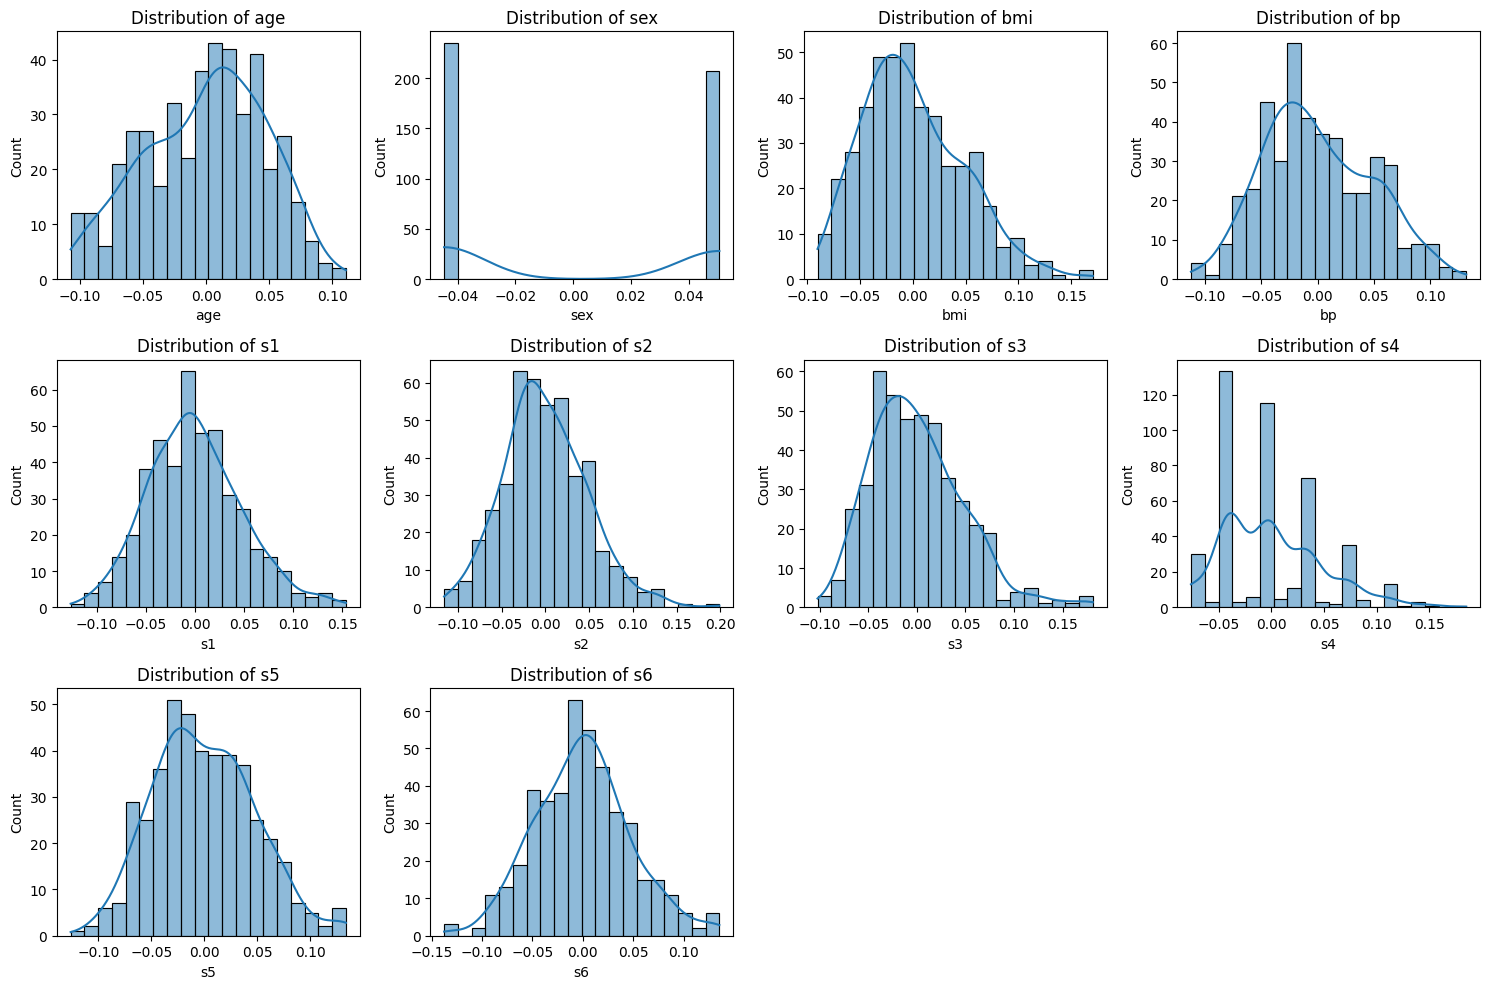

In [15]:
#  Distribution Plots for Features and Target Variable
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

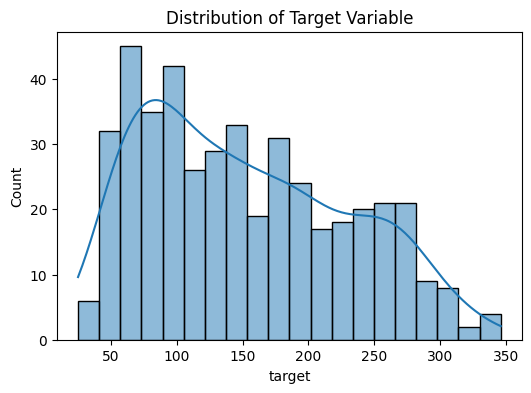

In [16]:
# Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df['target'], kde=True, bins=20)
plt.title('Distribution of Target Variable')
plt.show()

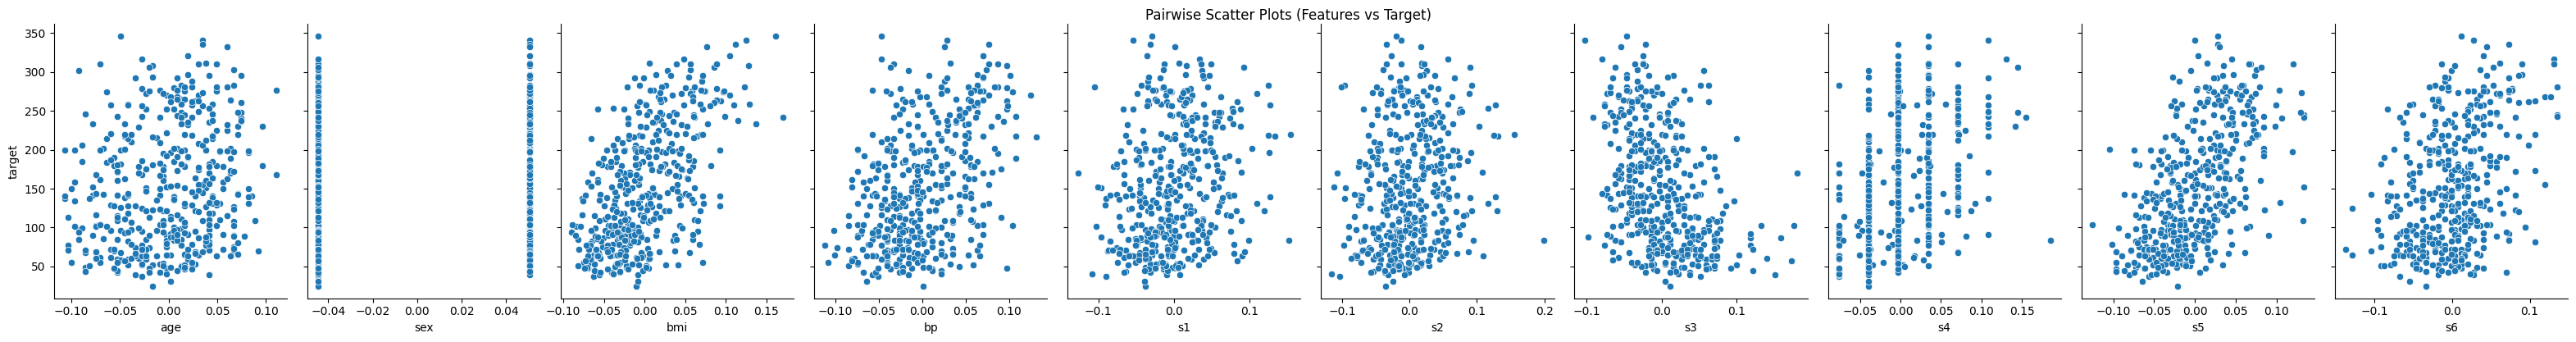

In [17]:
#  Pairwise Scatter Plots
sns.pairplot(df, x_vars=diabetes_data.feature_names, y_vars='target', height=4, aspect=0.8)
plt.suptitle('Pairwise Scatter Plots (Features vs Target)', y=1.02)
plt.show()

In [18]:
#  Correlation Matrix
correlation_matrix = df.corr()

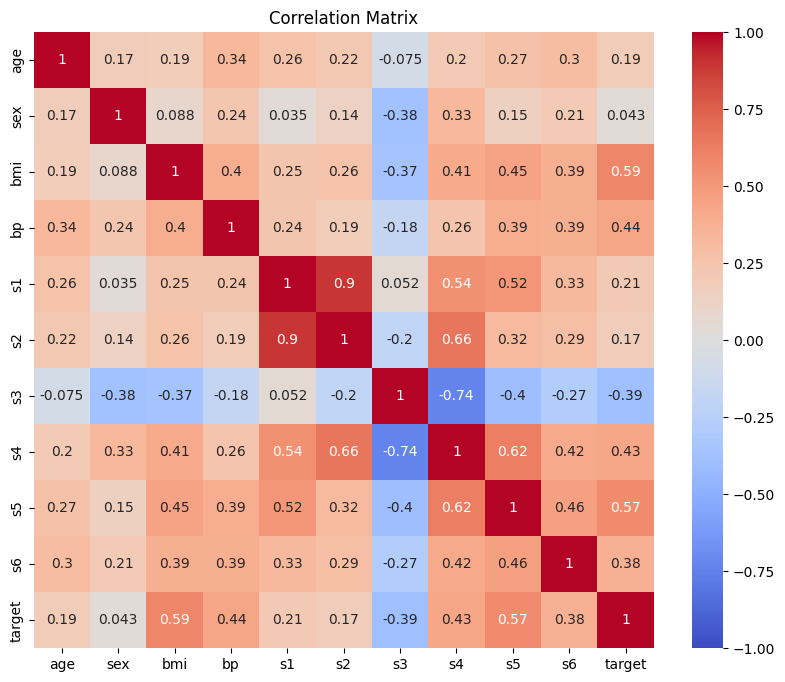

In [19]:
# Heatmap for the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.optimizers import Adam

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.optimizers import Adam

# Design the ANN Model
model = Sequential()

# Input layer + Hidden Layer with ReLU activation function
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Adding a second hidden layer (optional)
model.add(Dense(32, activation='relu'))

# Output layer with a single neuron (no activation for regression)
model.add(Dense(1, activation='linear'))

# 2. Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 4. Evaluate the Model on the Test Set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Predictions (Optional)
y_pred = model.predict(X_test)

# Print a few predictions to compare
print("First 5 Predictions:", y_pred[:5].flatten())
print("First 5 Actual Values:", y_test[:5])

C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0033 - mae: 0.0183 - val_loss: 0.0030 - val_mae: 0.0159
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030 - mae: 0.0124 - val_loss: 0.0029 - val_mae: 0.0076
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - mae: 0.0074 - val_loss: 0.0029 - val_mae: 0.0081
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - mae: 0.0082 - val_loss: 0.0029 - val_mae: 0.0084
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029 - mae: 0.0072 - val_loss: 0.0029 - val_mae: 0.0063
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029 - mae: 0.0057 - val_loss: 0.0029 - val_mae: 0.0064
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029 - mae: 0.0062 - val_loss: 0.0029 - val_mae: 0.0066
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029 - mae: 0.0062 - val_loss: 0.0029 - val_mae: 0.0059
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mae: 

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [23]:
from tensorflow.keras.layers import LeakyReLU, ELU

# 1. Experiment with a deeper architecture
model = Sequential()

# First hidden layer with 128 neurons and LeakyReLU activation
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))

# Second hidden layer with 64 neurons and ELU activation
model.add(Dense(64))
model.add(ELU(alpha=1.0))

# Third hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with a single neuron (linear activation for regression)
model.add(Dense(1, activation='linear'))

# 2. Compile the Model with adjusted learning rate
# Use 'adam' optimizer with a lower learning rate
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 3. Train the Model with a smaller batch size
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# 4. Evaluate the Model on the Test Set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")

# Calculate R² Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0030 - mae: 0.0135 - val_loss: 0.0029 - val_mae: 0.0085
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mae: 0.0084 - val_loss: 0.0029 - val_mae: 0.0077
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mae: 0.0069 - val_loss: 0.0029 - val_mae: 0.0061
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mae: 0.0060 - val_loss: 0.0029 - val_mae: 0.0058
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mae: 0.0058 - val_loss: 0.0029 - val_mae: 0.0061
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mae: 0.0059 - val_loss: 0.0029 - val_mae: 0.0060
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mae: 0.0059 - val_loss: 0.0029 - val_mae: 0.0051
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mae: 0.0055 - val_loss: 0.0029 - val_mae: 0.0061
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.00

NameError: name 'r2_score' is not defined

In [27]:
df.shape

(442, 11)

## creation of ANN with 50 hidden layers

In [35]:

# Number of features in your input data
input_dim = 11  


# Number of hidden layers
num_hidden_layers = 50

# Create a sequential model
model = Sequential()

# Add the input layer
model.add(Dense(units=64, activation='relu', input_dim=input_dim))

# Add 49 hidden layers with 64 units each and ReLU activation
for _ in range(num_hidden_layers - 1):
   model.add(Dense(units=64, activation='relu'))

# Add the output layer
model.add(Dense(units=4, activation='softmax'))  # Change num_classes to match your problem's number of classes


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.activations import relu, tanh
from tensorflow.keras.regularizers import l2

In [38]:
# Baseline Model
def build_baseline_model():
    model = Sequential()
    model.add(Dense(32, activation=relu, input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_squared_error'])
    return model

baseline_model = build_baseline_model()
baseline_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
baseline_mse = baseline_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Baseline Model MSE: {baseline_mse}")


Baseline Model MSE: 0.0032170279882848263


In [39]:
# Experiment 1: Two Hidden Layers
def build_model_two_layers():
    model = Sequential()
    model.add(Dense(64, activation=relu, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=relu))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_squared_error'])
    return model

model_two_layers = build_model_two_layers()
model_two_layers.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
exp1_mse = model_two_layers.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 1 - Two Hidden Layers MSE: {exp1_mse}")


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Experiment 1 - Two Hidden Layers MSE: 0.0032076125498861074


In [40]:
# Experiment 2: Tanh Activation Function
def build_model_tanh():
    model = Sequential()
    model.add(Dense(64, activation=tanh, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=tanh))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_squared_error'])
    return model

model_tanh = build_model_tanh()
model_tanh.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
exp2_mse = model_tanh.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 2 - Tanh Activation MSE: {exp2_mse}")


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Experiment 2 - Tanh Activation MSE: 0.003205167129635811


In [41]:
# Experiment 3: Lower Learning Rate
def build_model_lower_lr():
    model = Sequential()
    model.add(Dense(64, activation=relu, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=relu))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mean_squared_error'])
    return model

model_lower_lr = build_model_lower_lr()
model_lower_lr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
exp3_mse = model_lower_lr.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 3 - Lower Learning Rate MSE: {exp3_mse}")


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Experiment 3 - Lower Learning Rate MSE: 0.0032144952565431595


In [43]:
from tensorflow.keras.layers import Dense, Dropout

In [44]:
# Experiment 4: Dropout Regularization
def build_model_dropout():
    model = Sequential()
    model.add(Dense(64, activation=relu, input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation=relu))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_squared_error'])
    return model

model_dropout = build_model_dropout()
model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
exp4_mse = model_dropout.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 4 - Dropout Regularization MSE: {exp4_mse}")


Experiment 4 - Dropout Regularization MSE: 0.003205209970474243


In [45]:
# Experiment 5: L2 Regularization
def build_model_l2():
    model = Sequential()
    model.add(Dense(64, activation=relu, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=relu, kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_squared_error'])
    return model

model_l2 = build_model_l2()
model_l2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
exp5_mse = model_l2.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 5 - L2 Regularization MSE: {exp5_mse}")


C:\Users\AP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Experiment 5 - L2 Regularization MSE: 0.0032052055466920137


In [46]:
print(f"Baseline Model MSE: {baseline_mse}")
print(f"Experiment 1 - Two Hidden Layers MSE: {exp1_mse}")
print(f"Experiment 2 - Tanh Activation MSE: {exp2_mse}")
print(f"Experiment 3 - Lower Learning Rate MSE: {exp3_mse}")
print(f"Experiment 4 - Dropout Regularization MSE: {exp4_mse}")
print(f"Experiment 5 - L2 Regularization MSE: {exp5_mse}")


Baseline Model MSE: 0.0032170279882848263
Experiment 1 - Two Hidden Layers MSE: 0.0032076125498861074
Experiment 2 - Tanh Activation MSE: 0.003205167129635811
Experiment 3 - Lower Learning Rate MSE: 0.0032144952565431595
Experiment 4 - Dropout Regularization MSE: 0.003205209970474243
Experiment 5 - L2 Regularization MSE: 0.0032052055466920137


###### Lower MSE indicates better model performance.
Compare the results of each experiment to the baseline to see how each change affected the model's performance.
Use this information to guide further tuning and optimization of your model.